In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
frame = cv.imread('GOAT.jpg')
frame = cv.resize(frame, (640, 360))    
h, w , c = frame.shape
print("IMAGEN ORIGINAL")
print("Alto: ", h, "Ancho: ", w, "Canales: ", c)

IMAGEN ORIGINAL
Alto:  360 Ancho:  640 Canales:  3


In [3]:
frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
matriz_gray = np.array(frame_gray)
np.savetxt("gray_GOAT.txt", matriz_gray, fmt='%d')

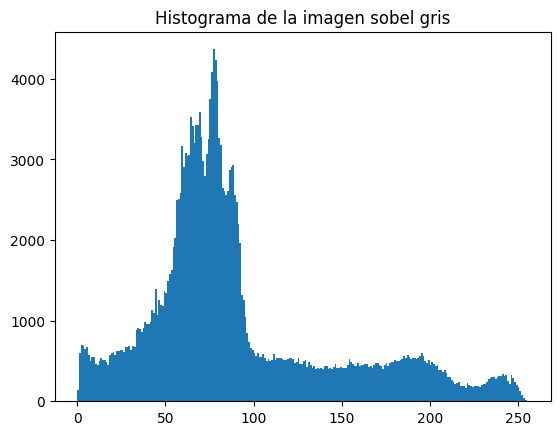

In [5]:
vector_img = matriz_gray.ravel()
plt.hist(vector_img, bins=256, range=[0,256])
plt.title('Histograma de la imagen sobel gris')
plt.show()

In [6]:
umbral = 150
for i in range(matriz_gray.shape[0]):
    for j in range(matriz_gray.shape[1]):
        if matriz_gray[i][j] > umbral:
            matriz_gray[i][j] = 255
        else:
            matriz_gray[i][j] = 0

In [8]:
cv.imwrite('umbral_GOAT.jpg', matriz_gray)
imagen_binaria = cv.imread('umbral_GOAT.jpg')
frame_bin = cv.adaptiveThreshold(frame_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
_, frame_bin2 = cv.threshold(frame_gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

In [1]:
import cv2 as cv
def paso(x):
    pass

cv.namedWindow('Binario Movil')
cv.createTrackbar('umbral', 'Binario Movil', 1, 255, paso)
while True:
    cv.imshow('Original', frame)
    cv.moveWindow('Original', 0, 0)

    cv.imshow('Gray', frame_gray)
    cv.moveWindow('Gray', w, 0)

    cv.imshow('Umbral', imagen_binaria)
    cv.moveWindow('Umbral', 2*w, 0)

    cv.imshow('Binaria', frame_bin)
    cv.moveWindow('Binaria', 0, h+190)

    cv.imshow('Binaria2', frame_bin2)
    cv.moveWindow('Binaria2', w, h+190)

    um = cv.getTrackbarPos('umbral', 'Binario Movil')
    _, frame_movil_bin = cv.threshold(frame_gray, um, 255, cv.THRESH_BINARY)
    cv.imshow('Binario Movil', frame_movil_bin)
    cv.moveWindow('Binario Movil', 2*w, h+190)

    k = cv.waitKey(60)
    if k == ord('q'):
        break
cv.destroyAllWindows()

NameError: name 'cv' is not defined